# Predicting House Prices in California with `LinearRegression()`

In this lab you will start inspect, analyze, visualize house price data from different districts in California, US. After having performed analysis, EDA and some feature engineering, you will build your own `LinearRegression()`  with `SkLearn`. 

In [1]:
import numpy as np
import pandas as pd
import learn

from numpy.conftest import dtype
from sklearn.metrics import r2_score, root_mean_squared_error
# Import your libraries:

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("../data/housing.csv")

# Part 1 - Inspection and Cleaning


#### Import and Inspect your data

Read the `housing.csv` file and make use of some methods to understand your data better. Below is an explanation of the features you are going to work with:

1. **longitude:**  geographical coordinate, east to west position of district
2. **latitude:**  geographical coordinate, north to south position of district
3. **housing_median_age:** the median age of houses in district
4. **total_rooms** Sum of all rooms in district
5. **total_bedrooms** Sum of all bedrooms in district
6. **population:** total population in district
7. **households:** total households in district
8. **median_income:** median household income in district 
9. **median_house_value:** median house value in district
10. **ocean_proximity:** District´s proximity to the ocean

In [2]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

Index(['ocean_proximity'], dtype='object')


#### Histograms
Make histograms of all your numeric columns in order to get a good understanding of the distribution of your data points. What do you see?

<Figure size 800x600 with 0 Axes>

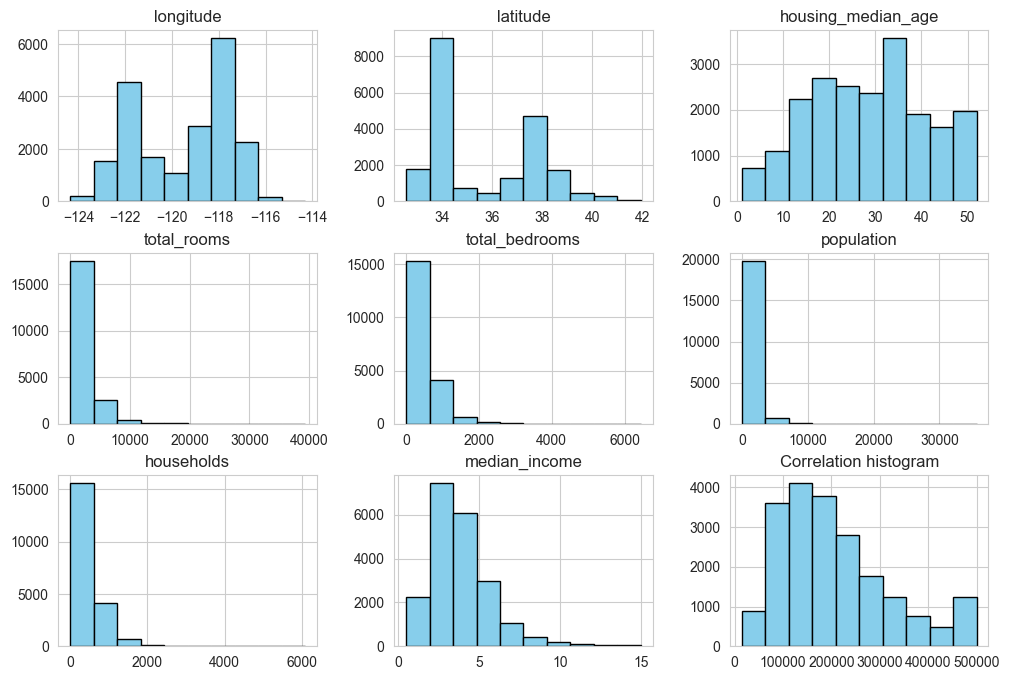

In [6]:

matrix=df._get_numeric_data()
plt.figure(figsize=(8, 6))
matrix.hist( figsize=(12, 8),
    color='skyblue',
    edgecolor='black' )
plt.title('Correlation histogram')
plt.show()

#### Let's create some features a tidy up our data

1. Locate your NaN values and make a decision on how to handle them. Drop, fill with mean, or something else, it is entirely up to you. 

In [7]:
missing_counts = df.isna().sum()
print(missing_counts)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [8]:
df.dropna(axis=0, how="any", inplace=True)

2. Create three new columns by using simple arithmetic operations. Create one column with "rooms per household", one with "population per household",  and one with "bedrooms per room".

In [9]:
df["rooms_per_household"]=df["total_rooms"]/df["households"]

In [10]:
df["population_per_household"]=df["population"]/df["households"]

In [11]:
df["bedrooms_per_room"]=df["total_bedrooms"]/df["total_rooms"]

3. If you check the largest and smallest values of your "rooms per houshold column" you will see two outliers and two values that are just wrong. Drop the four values by index.

In [21]:
max=df["rooms_per_household"].nlargest(2)


In [ ]:
min=df["rooms_per_household"].nsmallest(2)

In [26]:
indices=[]
for i in max:
    ind=df[df["rooms_per_household"] == i].index
    indices.append(ind.tolist()[0])
for j in min:
    ind=df[df["rooms_per_household"] == j].index
    indices.append(ind.tolist()[0])
print(indices)

[1914, 1979, 5916, 8219]


In [28]:
df.drop(df.index[indices] , inplace=True)


# Part 2 - Exploratory Data Analysis



#### Let's find out what factors have an influence on our predicting variable

1. Let's check out the distribution of our "median house value". Visualize your results with 100 bins.

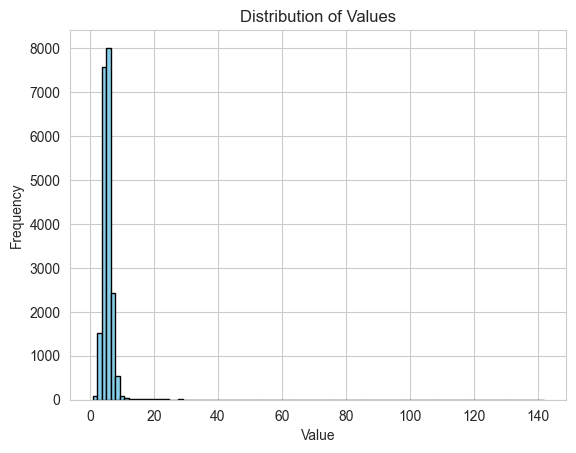

In [30]:

plt.hist(df['rooms_per_household'], bins=100, color='skyblue', edgecolor='black')

plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

2. Check out what variables correlates the most with "median house value"

In [102]:
corr_house_val = df.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)
print(corr_house_val)


median_house_value          1.000000
median_income               0.688493
rooms_per_household         0.151356
total_rooms                 0.133250
housing_median_age          0.106362
households                  0.064827
total_bedrooms              0.049604
population_per_household   -0.023625
population                 -0.025331
longitude                  -0.045535
latitude                   -0.144461
bedrooms_per_room          -0.255857
Name: median_house_value, dtype: float64


3. Let's check out the distribution of the column that has the highest correlation to "median house value". Visualize your results with 100 bins.

Most correlated feature: median_income


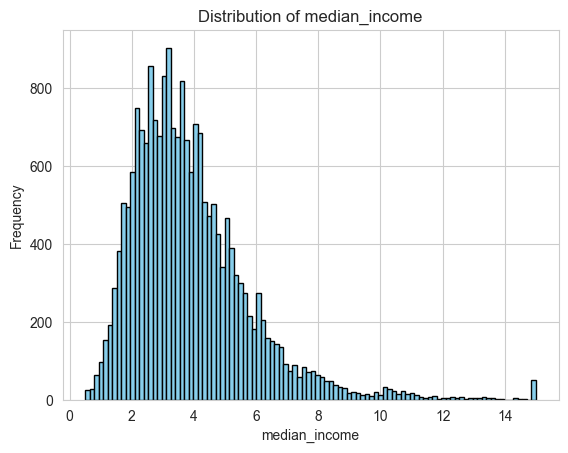

In [42]:
top_feature = corr_house_val.index[1]  # index[0] is usually 'median_house_value' itself
print("Most correlated feature:", top_feature)
plt.hist(df[top_feature], bins=100, color='skyblue', edgecolor='black')
plt.title(f'Distribution of {top_feature}')
plt.xlabel(top_feature)
plt.ylabel('Frequency')
plt.show()

4. Visualize the "median house value" and "median income" in a jointplot (kind="reg"). What do you see?

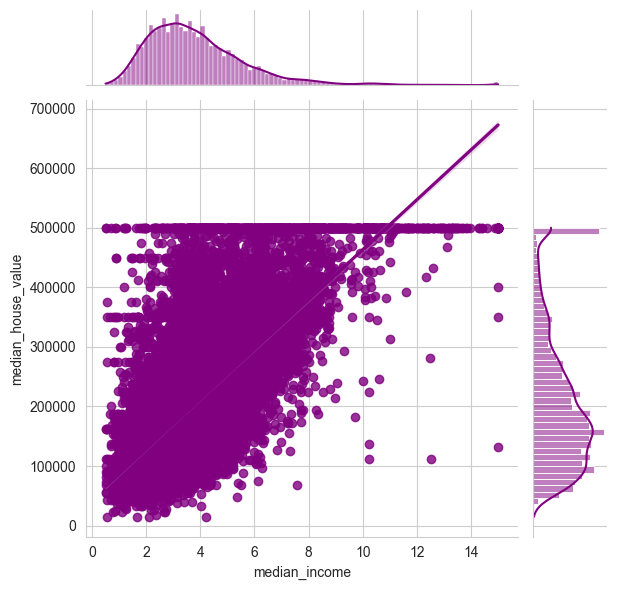

In [44]:
sns.jointplot(data=df, x=top_feature, y='median_house_value', kind='reg', color='purple')

5. Make the same visualization as in the above, but, cahnge the kind parameter to "kde". What extra information does this type of visualization convey, that the one in the above does not?

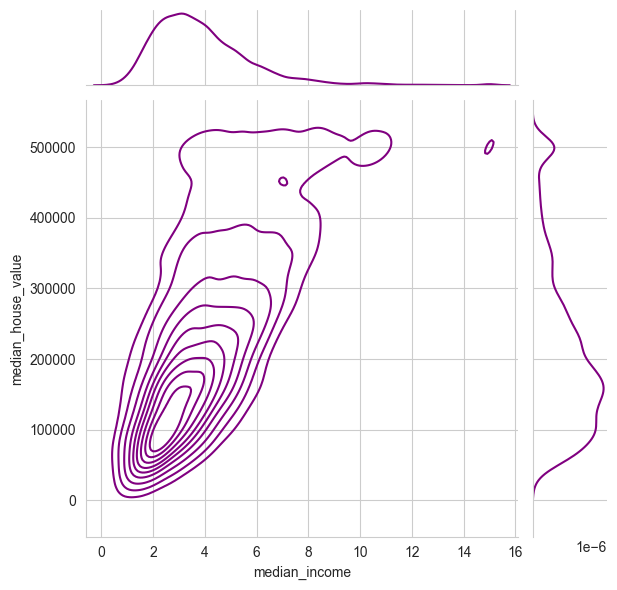

In [45]:
sns.jointplot(data=df, x=top_feature, y='median_house_value', kind='kde', color='purple')

#### Let's get schwifty with some EDA

1. Create a new categorical column from the "median income" with the following quartiles `[0, 0.25, 0.5, 0.75, 0.95, 1]` and label them like this `["Low", "Below_Average", "Above_Average", "High", "Very High"]` and name the column "income_cat"

In [47]:
labels = ["Low", "Below_Average", "Above_Average", "High", "Very_High"]
range = [0, 0.25, 0.5, 0.75, 0.95, 1]
cutoffs =df["median_income"].quantile(range)
print(cutoffs)
df["income_cat"] = pd.cut(
    df["median_income"],
    bins=cutoffs,
    labels=labels,
    include_lowest=True
)

0.00     0.49990
0.25     2.56370
0.50     3.53640
0.75     4.74370
0.95     7.30036
1.00    15.00010
Name: median_income, dtype: float64


2. Using the Seaborn library, plot the count of your new column and set the `hue` to "ocean_proximity". What interesting things can you see?

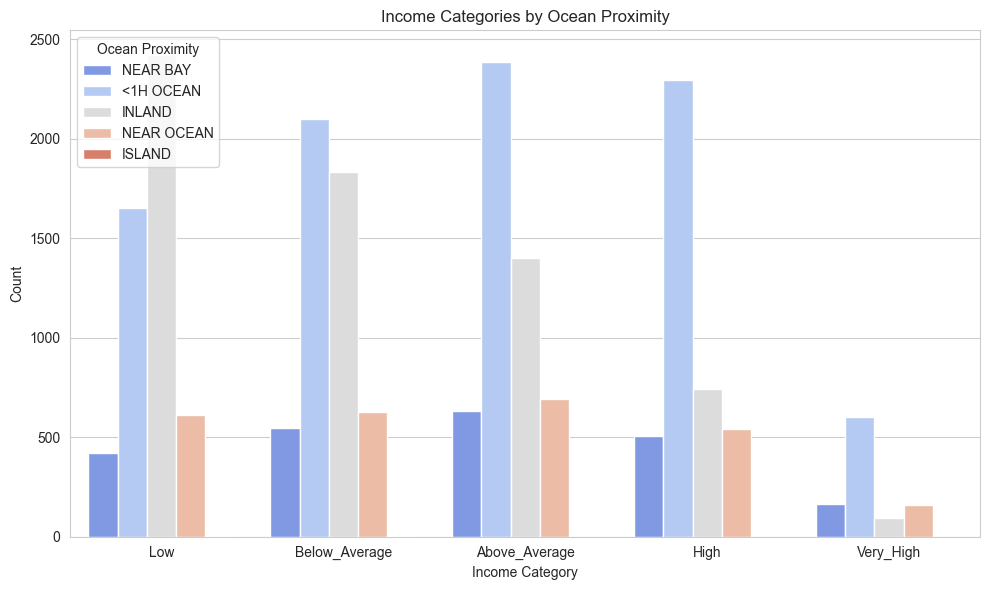

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    x="income_cat",
    hue="ocean_proximity",
    palette="coolwarm"
)

plt.title("Income Categories by Ocean Proximity")
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.legend(title="Ocean Proximity", loc='upper left')
plt.tight_layout()
plt.show()

3. Create two barplots where you set "y="median_house_value" on both, and the x is first "income cat" and then "ocean_proximity". How does these two graphs complement what you saw in the graph in your previous question?

C:\Users\Rajat Shrivastava\AppData\Local\Temp\ipykernel_16872\252782990.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


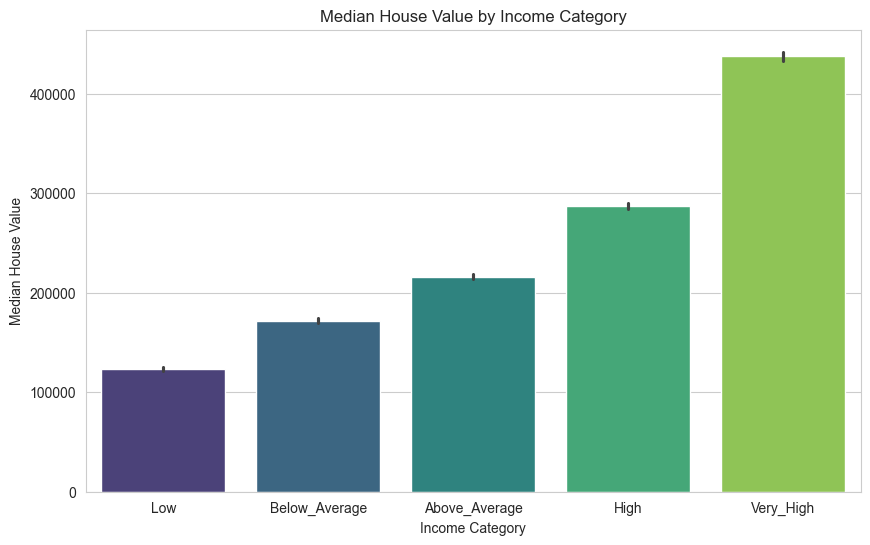

C:\Users\Rajat Shrivastava\AppData\Local\Temp\ipykernel_16872\252782990.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


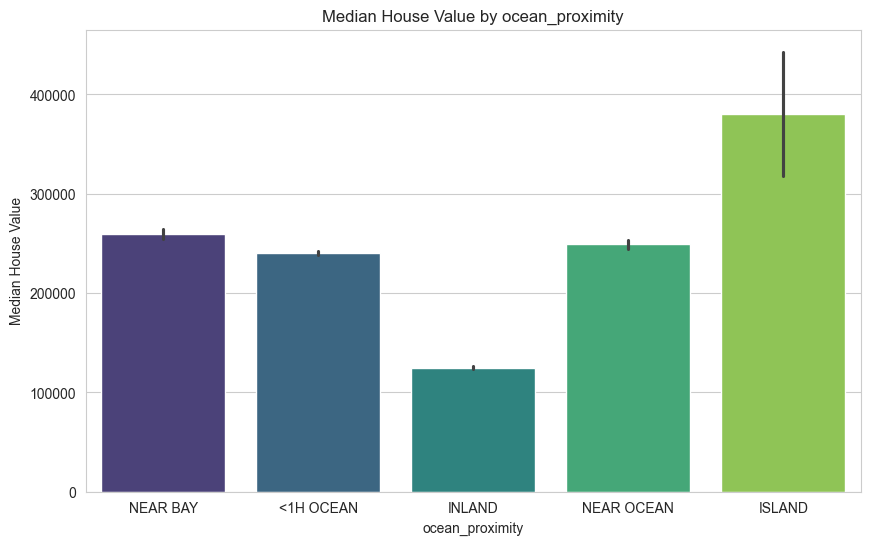

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x="income_cat",
    y="median_house_value",
    palette="viridis"
)

plt.title("Median House Value by Income Category")
plt.xlabel("Income Category")
plt.ylabel("Median House Value")
plt.show()


plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x="ocean_proximity",
    y="median_house_value",
    palette="viridis"
)

plt.title("Median House Value by ocean_proximity")
plt.xlabel("ocean_proximity")
plt.ylabel("Median House Value")
plt.show()

4. Create a pivoted dataframe where you have the values of the "income cat" column as indices and the values of the "ocean_proximity" column as columns. Also drop the "ISLAND" column that you'll get.

In [54]:
piv_df= df.pivot_table(
    index='income_cat',
    columns='ocean_proximity',
    values='median_house_value',
    aggfunc='mean',
    fill_value=0
)
print(piv_df)

ocean_proximity      <1H OCEAN         INLAND    ISLAND       NEAR BAY  \
income_cat                                                               
Low              161337.076923   84837.143624  450000.0  155122.052133   
Below_Average    197236.013829  115125.900763  363050.0  220196.177656   
Above_Average    232278.358759  147820.944246       0.0  261972.645008   
High             292208.766217  208168.336927       0.0  322437.049407   
Very_High        439784.235489  347571.736842       0.0  451015.078788   

ocean_proximity     NEAR OCEAN  
income_cat                      
Low              148027.826514  
Below_Average    208665.190096  
Above_Average    254939.678726  
High             337446.227778  
Very_High        468739.723270  


C:\Users\Rajat Shrivastava\AppData\Local\Temp\ipykernel_16872\1794464868.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv_df= df.pivot_table(


In [55]:
piv_df.drop(columns='ISLAND', inplace=True)

5. Turn your pivoted dataframe into a heatmap. The heatmap should have annotations in integer format.

ValueError: Unknown format code 'd' for object of type 'float'

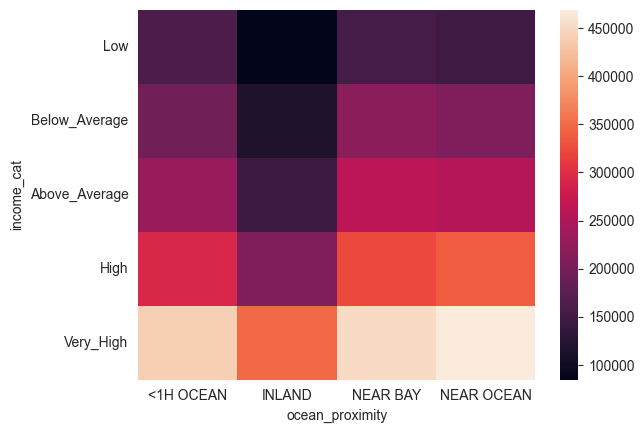

In [57]:
sns.heatmap(piv_df, annot=True, fmt="d")

# Part 3 - Preparing your Data



#### Splitting, Preparing and Engineering some Features

1. Let's drop the "income_cat" column as it has served its purpose already. We don't need for our model as we already have "median income".
Not dropping "incom cat" will lead to multicolinearity.

In [58]:
df.drop(columns='income_cat', inplace=True)

2. Select your floating point columns and standardize your data by calculating the Z-score. You can apply the `stats.zscore()` method in a lambda function. Save your results to a variable called `z_scored`. 

In [60]:
import scipy.stats as stats

In [63]:
# z_scores = (data - mean) / std_dev
z_scored=df._get_numeric_data().apply(lambda x: stats.zscore(x))
print(z_scored)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0      -1.327184  1.051735            0.982220    -0.803866       -0.970372   
1      -1.322193  1.042373           -0.606186     2.041951        1.348112   
2      -1.332174  1.037692            1.855844    -0.535255       -0.825615   
3      -1.337165  1.037692            1.855844    -0.623572       -0.718827   
4      -1.337165  1.037692            1.855844    -0.462039       -0.612039   
...          ...       ...                 ...          ...             ...   
20635  -0.758221  1.800692           -0.288505    -0.444650       -0.388971   
20636  -0.818112  1.805373           -0.844447    -0.887607       -0.920537   
20637  -0.823103  1.777287           -0.923867    -0.175123       -0.125561   
20638  -0.873012  1.777287           -0.844447    -0.355418       -0.305914   
20639  -0.833085  1.749201           -1.003288     0.067863        0.185311   

       population  households  median_income  media

3. Turn the only categorical columns into dummies. Be vary of the dummy trap, to avoid multicolinearity.

In [64]:
categorical_cols = df.select_dtypes(include='object')
df_dummies = pd.get_dummies(categorical_cols, drop_first=True)

4. Save our predicting variable to `y`.

In [65]:
y=df['median_house_value']

5. Concatenate `z_scored` and `dummies` and drop the predicting variable. Save to the varible `X`.

In [70]:
X=pd.concat([z_scored, df_dummies], axis=1).drop(columns='median_house_value')
print(X.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'population_per_household', 'bedrooms_per_room',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')


# Part 4 - Machine Learning 




#### Train, Test, Split

1. Import `train_test_split` and split your data accordingly. Choose an appropriate test size.

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#### Building and Training our Model

2. Build, fit and train a `LinearRegression` model. 

In [74]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()

In [75]:

lreg.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


3. In a scatterplot, visualize the y_train on your x-axis and your predictions on the y-axis. How does your training predictions look? 

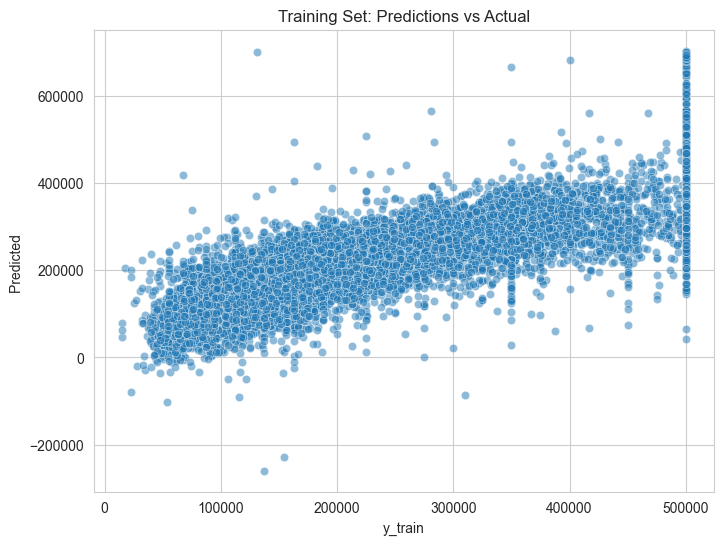

In [107]:

y_pred=lreg.predict(X_train)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_train, y=y_pred, alpha=0.5)
# plt.plot(y_train,y_pred)  # reference line y=x
plt.xlabel("y_train")
plt.ylabel("Predicted ")
plt.title("Training Set: Predictions vs Actual")
plt.show()

4. From the sklearn metrics module, print the mean_squared_error and R^2-score. What does the metrics tell us?

In [101]:
from sklearn import metrics

In [103]:
mse=metrics.mean_squared_error(y_train,y_pred)
print(mse)


4558647328.012744


In [104]:
rscore=metrics.r2_score(y_train,y_pred)
print(rscore)


0.6588257338168557


#### Final Predictions

1. Now you are ready to make prediction on the test data. Do that and visualize your results in a new scatterplot.

In [108]:
y_pred=lreg.predict(X_test)

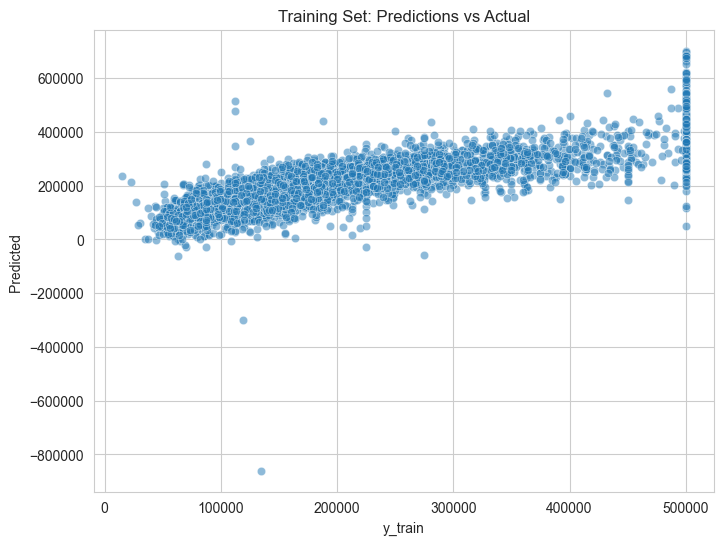

In [110]:
y_pred=lreg.predict(X_test)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("Predicted ")
plt.title("Training Set: Predictions vs Actual")
plt.show()

2. Print the mean_squared_error and R^2-score again. What has happened?

In [112]:
mse=metrics.mean_squared_error(y_test,y_pred)
print(mse)

4855620359.673485


In [113]:
rscore=metrics.r2_score(y_test,y_pred)
print(rscore)

0.6308830552460591


3. There is another metric called Root mean squared error, Which is the square root of the MSE. Calculate the RMSE.

In [116]:
rmse=metrics.root_mean_squared_error(y_test,y_pred)
print(rmse)

69682.2815332096


# Bonus Questions 1

1. Create a dataframe with two columns, one consisting of the y_test and one of your model's predictions.

In [120]:
new_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

2. Make a series of of your new dataframe, by calculating the predicted error in absolut numbers. Save this series to variable name `absolute_errors`.

In [122]:
absolute_errors=(new_df["Actual"]-new_df["Predicted"]).abs()
print(absolute_errors)
m=absolute_errors.mean()
print(m)

17085    15438.088314
1590      1655.342862
1724     87398.887943
5200     19868.786535
12394    50714.057134
             ...     
8293     69370.417327
8503     32617.659796
2999     49640.319720
7926     34517.910540
7892     61125.630391
Length: 4086, dtype: float64
49785.52478998409


3. If you take the mean of your series, you will get the mean absolute errors, which is another metric for Linear Regressions.

# Bonus Question 2 - Build a Random Forest Regressor

1. Build, fit and train a `RandomForestRegressor` model. Do this by following the same staps that you followed when building your `LinearRegression`.

In [123]:
from sklearn.ensemble import RandomForestRegressor

In [124]:
rfg=RandomForestRegressor(n_estimators=10,random_state=42)

In [125]:
rfg.fit(X_train,y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [129]:
y_pred=rfg.predict(X_train)


In [131]:
mse=metrics.root_mean_squared_error(y_train,y_pred)
print(mse)

22426.17593952839


In [136]:
rscore=metrics.r2_score(y_train,y_pred)
print(rscore)

0.9623599041182259


2. Make prediction on the test data and evaluate you results.

In [140]:
y_pred_test=rfg.predict(X_test)

In [141]:
mse=metrics.root_mean_squared_error(y_test,y_pred_test)
print(mse)

52564.43081449897


In [143]:
rscore=metrics.r2_score(y_test,y_pred_test)
print(rscore)

0.7899594286981302
